In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import os

sns.set_theme(style="whitegrid", context="paper", palette="binary")
formatter = ticker.ScalarFormatter(useMathText=True)

# Binary data

In [3]:
manila = pd.read_csv('standard_binary/measures.csv')
our = pd.read_csv('our_approach_binary/measures.csv')
aequitas = pd.read_csv('aequitas_binary/measures.csv')
manila_time = pd.read_fwf("standard_binary/times.txt", header=None)
manila["time"] = manila_time
our_time = pd.read_fwf('our_approach_binary/times.txt', header=None)
our['time'] = our_time
aequitas_time = pd.read_fwf('aequitas_binary/times.txt', header=None)
aequitas['time'] = aequitas_time
manila['approach'] = 'Baseline'
aequitas['approach'] = 'Aequitas'
our['approach'] = 'Our approach'
full = pd.concat([manila, aequitas, our])

## CPU Consumption

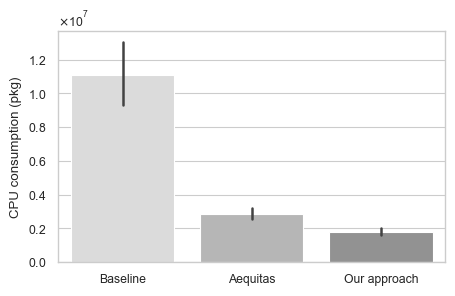

In [4]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=full, x='approach', y='pkg', hue='approach', ax=ax, )
ax.set_ylabel('CPU consumption (pkg)')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(formatter)
# plt.title('CPU consumption')
plt.savefig('figs/pkg_bin.pdf', bbox_inches='tight')
plt.show()

In [5]:
stats.mannwhitneyu(manila["pkg"], our["pkg"])

MannwhitneyuResult(statistic=56338.0, pvalue=1.5843495882129454e-39)

In [6]:
stats.mannwhitneyu(
    aequitas["pkg"],
    our["pkg"])

MannwhitneyuResult(statistic=43929.0, pvalue=3.3772329371507216e-09)

## Execution time

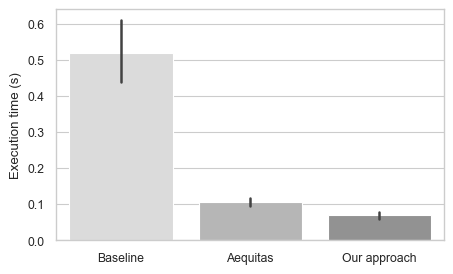

In [7]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=full, x="approach", y="time", hue="approach", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
# plt.title("Execution time")
plt.savefig("figs/time_bin.pdf", bbox_inches="tight")
plt.show()

In [8]:
stats.mannwhitneyu(manila["time"], our["time"])

MannwhitneyuResult(statistic=59209.0, pvalue=9.20179482211733e-50)

In [9]:
stats.mannwhitneyu(our["time"], aequitas["time"])

MannwhitneyuResult(statistic=20971.0, pvalue=6.985331985379599e-14)

# Binary and multi-class datasets

In [70]:
manila = pd.read_csv("manila_full/measures.csv")
our = pd.read_csv("our_approach_full/measures.csv")
manila_time = pd.read_fwf("manila_full/times.txt", header=None)
manila["time"] = manila_time
our_time = pd.read_fwf("our_approach_full/times.txt", header=None)
our["time"] = our_time
manila["approach"] = "Baseline"
our["approach"] = "Our approach"
full = pd.concat([manila, our])

## CPU consumption

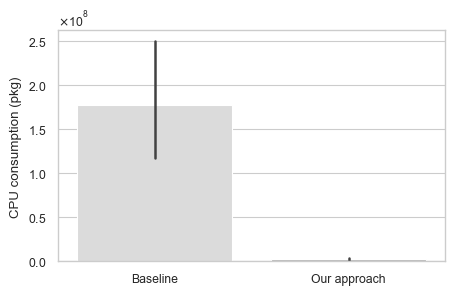

In [71]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=full, x="approach", y="pkg", hue="approach", ax=ax)
ax.set_ylabel("CPU consumption (pkg)")
ax.set_xlabel("")
ax.yaxis.set_major_formatter(formatter)
# plt.ylim(0, 0.5*10**9)
# plt.title("CPU consumption")
plt.savefig("figs/pkg_full.pdf", bbox_inches="tight")
plt.show()

In [24]:
stats.wilcoxon(manila["pkg"], our["pkg"])

WilcoxonResult(statistic=0.0, pvalue=4.3092972809371276e-77)

## Training time

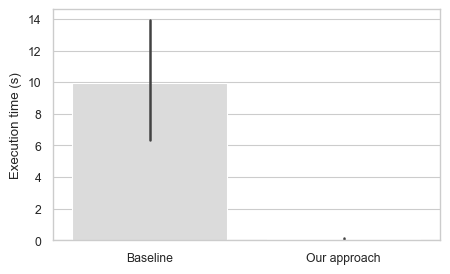

In [73]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=full, x="approach", y="time", hue="approach", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
# plt.title("Execution time")
plt.savefig("figs/time_full.pdf", bbox_inches="tight")
plt.show()

In [26]:
stats.wilcoxon(manila["time"], our["time"])

WilcoxonResult(statistic=0.0, pvalue=4.3092972809371276e-77)

## Model training time

C:\Users\giord\AppData\Local\Temp\ipykernel_20272\1094480280.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_measures = pd.concat([model_measures, pd.read_csv(f"model_training_grid_search_full/measures/{file}")])
C:\Users\giord\AppData\Local\Temp\ipykernel_20272\1094480280.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([""])


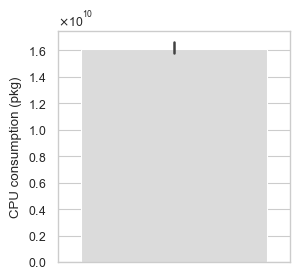

In [3]:
model_measures = pd.DataFrame()
for file in os.listdir("model_training_grid_search_full/measures/"):
  model_measures = pd.concat([model_measures, pd.read_csv(f"model_training_grid_search_full/measures/{file}")])

model_measures['model'] = 'Our approach'
fig, ax = plt.subplots(figsize=(3, 3))
ax.yaxis.set_major_formatter(formatter)
sns.barplot(data=model_measures, x="model", y="pkg", ax=ax)
ax.set_ylabel("CPU consumption (pkg)")
ax.set_xlabel("")
ax.set_xticklabels([""])
plt.savefig("figs/pgk_train.pdf", bbox_inches="tight")
# plt.title("CPU consumption (training)")
plt.show()

In [5]:
model_measures['pkg'].agg(['mean', 'std'])

mean    1.612350e+10
std     9.667389e+08
Name: pkg, dtype: float64

C:\Users\giord\AppData\Local\Temp\ipykernel_20272\1289891165.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([""])


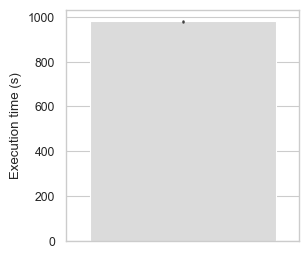

In [6]:
model_times = pd.DataFrame()
for file in os.listdir("model_training_grid_search_full/times/"):
    model_times = pd.concat(
        [
            model_times,
            pd.read_fwf(f"model_training_grid_search_full/times/{file}", header=None),
        ], axis=0
    )
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(data=model_times, ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
ax.set_xticklabels([""])
# plt.title("Execution time (training)")
plt.savefig("figs/time_train.pdf", bbox_inches="tight")
plt.show()

In [7]:
model_times.agg(["mean", "std"])

,0
mean,980.634084
std,8.292827
